In [14]:
import nasdaqdatalink as quandl
import pandas as pd

In [15]:
quandl.ApiConfig.api_key = 'NRvcyMwNMXZ2ooDSM3nw'
universe = quandl.get_table('SHARADAR/SP500', action='current')
universe.head()

,date,action,ticker,name,contraticker,contraname,note
None,,,,,,,
0,2023-10-14,current,ZTS,ZOETIS INC,N/A,N/A,None
1,2023-10-14,current,ZION,ZIONS BANCORPORATION NATIONAL ASSOCIATION,N/A,N/A,None
2,2023-10-14,current,ZBRA,ZEBRA TECHNOLOGIES CORP,N/A,N/A,None
3,2023-10-14,current,ZBH,ZIMMER BIOMET HOLDINGS INC,N/A,N/A,None
4,2023-10-14,current,YUM,YUM BRANDS INC,N/A,N/A,None


AR excludes restatements

| DIMENSIONS | AS REPORTED | MOST-RECENT REPORTED |
| --- | --- | --- |
| Annual | ARY | MRY |
| Quarterly	| ARQ | MRQ |
| Trailing Twelve Months | ART | MRT|

In [16]:
fundamentals = quandl.get_table('SHARADAR/SF1', datekey={'gte':'2023-03-31','lte':'2023-08-31'}, dimension="ART", ticker=",".join(universe['ticker'].to_list()))
fundamentals = fundamentals.drop_duplicates("ticker", keep="first")
fundamentals.head()
# 'ticker', 'dimension', 'calendardate', 'datekey', 'reportperiod', 'lastupdated', 'accoci', 'assets', 'assetsavg', 'assetsc', 'assetsnc', 'assetturnover', 'bvps', 'capex', 'cashneq', 'cashnequsd', 'cor', 'consolinc', 'currentratio', 'de', 'debt', 'debtc', 'debtnc', 'debtusd',
# 'deferredrev', 'depamor', 'deposits', 'divyield', 'dps', 'ebit', 'ebitda', 'ebitdamargin', 'ebitdausd', 'ebitusd', 'ebt', 'eps', 'epsdil', 'epsusd', 'equity', 'equityavg', 'equityusd', 'ev', 'evebit', 'evebitda', 'fcf', 'fcfps', 'fxusd', 'gp', 'grossmargin', 'intangibles', 'intexp',
# 'invcap', 'invcapavg', 'inventory', 'investments', 'investmentsc', 'investmentsnc', 'liabilities', 'liabilitiesc', 'liabilitiesnc', 'marketcap', 'ncf', 'ncfbus', 'ncfcommon', 'ncfdebt', 'ncfdiv', 'ncff', 'ncfi', 'ncfinv', 'ncfo', 'ncfx', 'netinc', 'netinccmn', 'netinccmnusd',
# 'netincdis', 'netincnci', 'netmargin', 'opex', 'opinc', 'payables', 'payoutratio', 'pb', 'pe', 'pe1', 'ppnenet', 'prefdivis', 'price', 'ps', 'ps1', 'receivables', 'retearn', 'revenue', 'revenueusd', 'rnd', 'roa', 'roe', 'roic', 'ros', 'sbcomp', 'sgna', 'sharefactor', 'sharesbas',
# 'shareswa', 'shareswadil', 'sps', 'tangibles', 'taxassets', 'taxexp', 'taxliabilities', 'tbvps', 'workingcapital'
# https://data.nasdaq.com/tables/SHARADAR-INDICATORS/export?api_key=2t6jF1958vkM2PYyDF1v&table%5B%5D=SF1&table%5B%5D=TICKERS

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,ZTS,ART,2023-06-30,2023-08-08,2023-06-30,2023-08-08,-895000000,13749000000,1.402550e+10,6.183000e+09,...,460316905,461900000,462900000.0,17.800,9783000000,192000000,619000000.0,486000000,21.180,4.414000e+09
2,ZION,ART,2023-06-30,2023-08-04,2023-06-30,2023-08-07,-2930000000,87230000000,8.845550e+10,NaN,...,148145133,147692000,147696000.0,21.091,86168000000,0,265000000.0,0,583.430,NaN
4,ZBRA,ART,2023-06-30,2023-08-01,2023-07-01,2023-08-01,-60000000,7456000000,7.476750e+09,1.753000e+09,...,51338364,51338364,NaN,107.132,2983000000,461000000,153000000.0,91000000,58.105,-1.700000e+07
6,ZBH,ART,2023-06-30,2023-08-01,2023-06-30,2023-08-01,-177800000,21294300000,2.123428e+10,4.387900e+09,...,208964134,208600000,209900000.0,34.494,7522900000,0,159800000.0,932200000,36.064,2.154200e+09
8,YUM,ART,2023-06-30,2023-08-07,2023-06-30,2023-08-07,-293000000,5848000000,5.805500e+09,1.515000e+09,...,280211281,280211281,NaN,24.949,4838000000,821000000,303000000.0,50000000,17.266,2.800000e+07


In [17]:
fundamentals["operating_margin"] = fundamentals["opinc"] / fundamentals["revenue"]
fundamentals["operating_margin"].describe()

count    498.000000
mean       0.181247
std        0.167587
min       -1.552697
25%        0.096449
50%        0.170057
75%        0.257460
max        0.868417
Name: operating_margin, dtype: float64

In [18]:
# revenue can be 0 (companies with no sales)
revenue = fundamentals.revenue
fundamentals["operating_margin"] = fundamentals.opinc / revenue.where(revenue > 0)
fundamentals["operating_margin"].describe()
# operating margin can also be negative: a company can spend arbitrarily more than it brings in as revenue

count    498.000000
mean       0.181247
std        0.167587
min       -1.552697
25%        0.096449
50%        0.170057
75%        0.257460
max        0.868417
Name: operating_margin, dtype: float64

In [20]:
fundamentals.sort_values('operating_margin', ascending=False).drop_duplicates().head(2)[["ticker", "dimension", "calendardate", "datekey", "reportperiod", "operating_margin", "revenue", "opinc", "gp", "cor", "opex"]]
# A negative operating expense or cost of revenue is unexpected and may indicate an unusual one-time accounting adjustment made by the company; further investigation (such as viewing the full report on the SEC website) would be required to determine with certainty.

,ticker,dimension,calendardate,datekey,reportperiod,operating_margin,revenue,opinc,gp,cor,opex
None,,,,,,,,,,,
71,VICI,ART,2023-06-30,2023-07-26,2023-06-30,0.868417,3.297254e+09,2.863392e+09,3.200710e+09,96544000.0,337318000.0
60,VRSN,ART,2023-06-30,2023-07-27,2023-06-30,0.664821,1.462500e+09,9.723000e+08,1.261800e+09,200700000.0,289500000.0


In [22]:
# exclude companies with negative operating expenses or negative cost of revenue
opex = fundamentals.opex
cor = fundamentals.cor
operating_margin = fundamentals["operating_margin"].where((opex > 0) & (cor > 0))
operating_margin.describe()

count    458.000000
mean       0.169676
std        0.165881
min       -1.552697
25%        0.091912
50%        0.161193
75%        0.247400
max        0.868417
Name: operating_margin, dtype: float64

<Axes: ylabel='Frequency'>

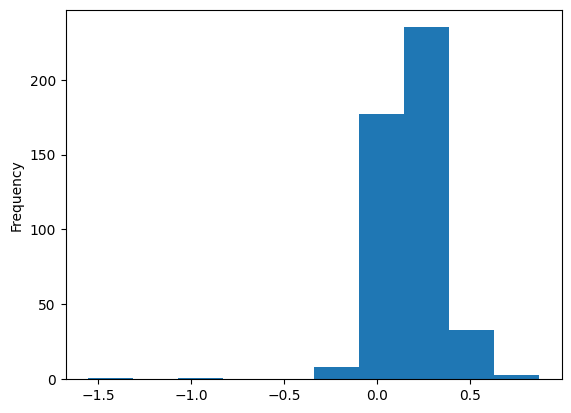

In [23]:
operating_margin.plot.hist()

<Axes: ylabel='Frequency'>

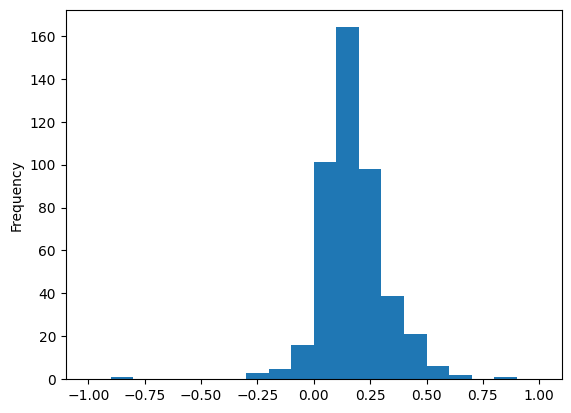

In [24]:
operating_margin.plot.hist(bins=20, range=(-1, 1))

<Axes: ylabel='Frequency'>

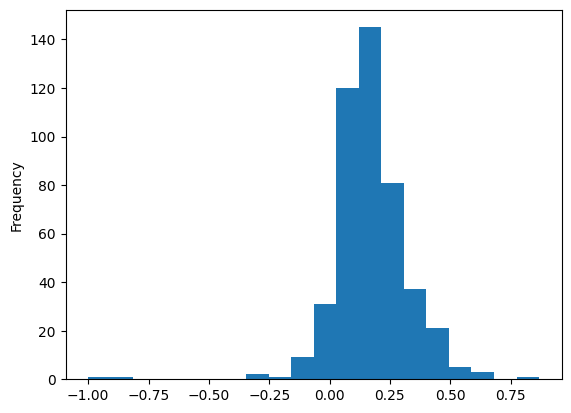

In [28]:
# Beyond a certain point, increasingly negative operating margins don't provide useful additional information; it's enough to know that the company is very unprofitable.
operating_margin = operating_margin.clip(-1, 1)
operating_margin.plot.hist(bins=20)
# While exploratory data analysis is arguably not the most exciting step of the research process since it doesn't tell us a factor's predictive value, it is an important preparatory step that helps ensure that subsequent research is meaningful. 